In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

## Using the MINST Fashon dataset ##

### Creates ###
- train_images and train_labels -> numpy arrays containing the 28x28 Images and the corresponding lable   used for training
- test_images and test_labels -> numpy arrays containing the 28x28 Images and the corresponding lable   used for testing

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Label Names for the Labels ##

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Prepocess the images ##

The Image-Pixels fall into the range from 0 to 255
but for the NN they should be between 0 and 1

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Check the Data ##

Display the first 25 Images

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
print(train_images[0])

## Reshape Trainings data ##

need to be in the shape [[[]]]   x, y, rgb

In [ ]:
train_images = train_images.reshape(-1,28,28,1)

## Set up the Layers ##

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Add Dense Layer ##

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## Compile the Model ##
- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training ##

In [12]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 621us/sample - loss: 0.9650 - acc: 0.6371
Epoch 2/10
60000/60000 [==============================] - 32s 530us/sample - loss: 0.6734 - acc: 0.7450
Epoch 3/10
36032/60000 [=================>............] - ETA: 12s - loss: 0.6065 - acc: 0.7691

## Test the Model ##

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3400 - acc: 0.8859

Test accuracy: 0.8859


## Make predictions ##

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

Pred: 9
Label: Ankle boot


Text(0.5, 0, 'Ankle boot')

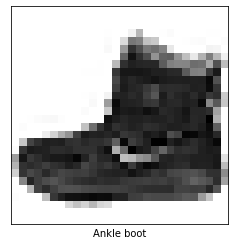

In [ ]:
i = 0
print ("Pred: " + str(np.argmax(predictions[i])))
print ("Label: " + class_names[test_labels[i]])
plt.subplot(1,1,i+1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[i]])